In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


These 3 folders from PatchClassifier need to be uploaded to Google drive as a zipped file: 
1. images/Mitosis
2. images/Nonmitosis 
3. Data_CMC1

Below they are unzipped.




In [ ]:
!cd /content/
!mkdir images 
!cd /content/images/
!unzip /content/drive/MyDrive/GitHub/Mitosis.zip
!unzip /content/drive/MyDrive/GitHub/Nonmitosis.zip
!cd /content/
!unzip /content/drive/MyDrive/GitHub/Data_CMC1.zip


/content/drive


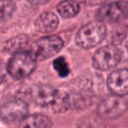

In [ ]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('Data_CMC1/test/Mitosis/10003.png')
img

In [ ]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import matplotlib
matplotlib.style.use('ggplot')

In [ ]:
train_path="Data_CMC1/train"
test_path="Data_CMC1/test"

In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = "Data_CMC1/train"
VALID_DATA_DIR = "Data_CMC1/test"

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    shuffle=True,
    target_size=IMAGE_SHAPE,
)
valid_generator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    shuffle=False,
    target_size=IMAGE_SHAPE,
)

Found 37950 images belonging to 2 classes.
Found 12332 images belonging to 2 classes.


In [ ]:
def build_model(num_classes):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model
model = build_model(num_classes=2)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
EPOCHS = 20
BATCH_SIZE = 32
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1185/1185 [==============================] - 130s 102ms/step - loss: 0.5761 - accuracy: 0.7193 - val_loss: 0.5756 - val_accuracy: 0.7384
Epoch 2/20
1185/1185 [==============================] - 88s 75ms/step - loss: 0.5372 - accuracy: 0.7472 - val_loss: 0.5422 - val_accuracy: 0.7320
Epoch 3/20
1185/1185 [==============================] - 86s 72ms/step - loss: 0.4989 - accuracy: 0.7700 - val_loss: 0.4945 - val_accuracy: 0.7680
Epoch 4/20
1185/1185 [==============================] - 91s 77ms/step - loss: 0.4662 - accuracy: 0.7852 - val_loss: 0.4717 - val_accuracy: 0.7754
Epoch 5/20
1185/1185 [==============================] - 86s 73ms/step - loss: 0.4371 - accuracy: 0.8008 - val_loss: 0.4542 - val_accuracy: 0.7887
Epoch 6/20
1185/1185 [==============================] - 87s 73ms/step - loss: 0.4140 - accuracy: 0.8137 - val_loss: 0.4537 - val_accuracy: 0.7879
Epoch 7/20
1185/1185 [==============================] - 86s 73ms/step - loss: 0.3959 - accuracy: 0.8225 - val_loss: 0.4678 - val_accu

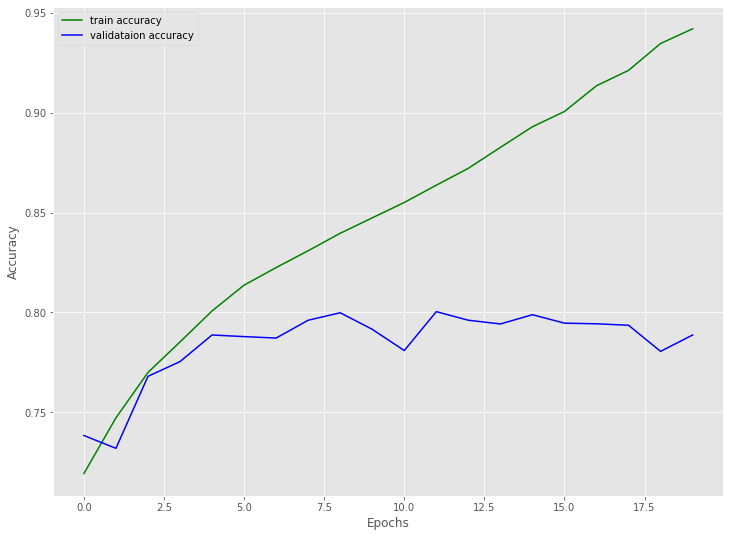

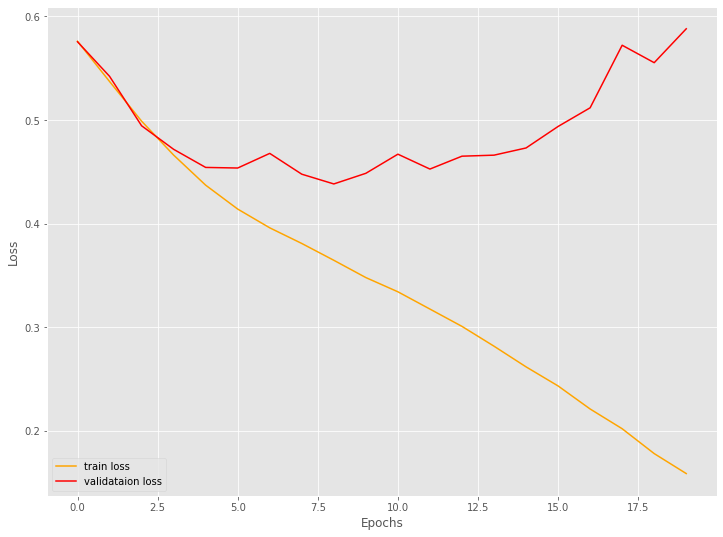

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']
def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    plt.show()
    # loss plots
    plt.figure(figsize=(12, 9))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')
    plt.show()
save_plots(train_acc, valid_acc, train_loss, valid_loss)

References: 


*   Tensorflow classification with custom dataset: https://debuggercafe.com/image-classification-using-tensorflow-on-custom-dataset/
*  Upload dataset to Colab: https://www.aboutdatablog.com/post/how-to-successfully-add-large-data-sets-to-google-drive-and-use-them-in-google-colab
* (Next) Save the model: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb
